## Class 2  
Downloading and entering data  
Basic stats and plots  

In the last class you entered data yourself.  Most of the data analysis you will be doing in this class, and likely in the future, will be using available datasets from which you can extract the data you want to examine.  In the class you will practise downloading data sets and opening them as pandas dataframe ready for cleaning and subsetting (next week).  We start with a few examples but feel free to find your own datasets to experiment with.

In [5]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Easy start. 
Opening a csv or excel sheet

In [16]:
df = pd.read_excel('count.xls')

In [17]:
df

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243
5,6,4,9,12,734
6,7,55,3,4,128
7,8,1,11,543,223
8,9,2,34,723,316
9,10,67,3,126,402


In [19]:
df = pd.read_csv('count.csv')

In [16]:
df

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243
5,6,4,9,12,734
6,7,55,3,4,128
7,8,1,11,543,223
8,9,2,34,723,316
9,10,67,3,126,402


In [144]:
df = pd.read_csv('count.txt')

In [145]:
df

,Field\tSheep\tGoats\tBarley\tOats
0,1\t45\t44\t103\t521
1,2\t5\t2\t233\t324
2,3\t67\t23\t432\t734
3,4\t8\t6\t612\t123
4,5\t23\t7\t332\t243
5,6\t4\t9\t12\t734
6,7\t55\t3\t4\t128
7,8\t1\t11\t543\t223
8,9\t2\t34\t723\t316
9,10\t67\t3\t126\t402


We need to specify what the delimitier is, in this case, tabs

In [146]:
df = pd.read_csv('count.txt', sep ='\t')
df

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243
5,6,4,9,12,734
6,7,55,3,4,128
7,8,1,11,543,223
8,9,2,34,723,316
9,10,67,3,126,402


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Field   10 non-null     int64
 1   Sheep   10 non-null     int64
 2   Goats   10 non-null     int64
 3   Barley  10 non-null     int64
 4   Oats    10 non-null     int64
dtypes: int64(5)
memory usage: 528.0 bytes
None


Pandas has decided all the data is simple integers.

What can go wrong?

In [161]:
df = pd.read_csv('count_duff1.txt',sep ='\t')
df

,Field,Sheep,Goats,Barley,Oats
0,1,45.0,44,103,521
1,2,NaN,2,233,324
2,3,67.0,23,432,734
3,4,8.0,6,612,123
4,5,23.0,*,332,243
5,6,4.0,9,12,734
6,7,55.0,*,*,128
7,8,1.0,11,543,223
8,9,2.0,34,723,316
9,10,67.0,3,*,*


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Field   10 non-null     int64  
 1   Sheep   9 non-null      float64
 2   Goats   10 non-null     object 
 3   Barley  10 non-null     object 
 4   Oats    10 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 528.0+ bytes
None


count_duff1.txt has missing data as asterixs. The asterixes are causing pandas to code the columns as objects - it won't be possible to do calculations with this data.  
We can specify that Pandas should treat the asterixs as missing data. 


In [166]:
df = pd.read_csv('count_duff1.txt',sep ='\t', na_values =["*"])
df

,Field,Sheep,Goats,Barley,Oats
0,1,45.0,44.0,103.0,521.0
1,2,NaN,2.0,233.0,324.0
2,3,67.0,23.0,432.0,734.0
3,4,8.0,6.0,612.0,123.0
4,5,23.0,NaN,332.0,243.0
5,6,4.0,9.0,12.0,734.0
6,7,55.0,NaN,NaN,128.0
7,8,1.0,11.0,543.0,223.0
8,9,2.0,34.0,723.0,316.0
9,10,67.0,3.0,NaN,NaN


In [167]:
df.dtypes

Field       int64
Sheep     float64
Goats     float64
Barley    float64
Oats      float64
dtype: object

If the missing data is just missing pandas can code it correctly

In [168]:
df = pd.read_csv('count_duff2.txt',sep ='\t')
df

,Field,Sheep,Goats,Barley,Oats
0,1,45.0,44.0,103.0,521.0
1,2,NaN,2.0,233.0,324.0
2,3,67.0,23.0,432.0,734.0
3,4,8.0,6.0,612.0,123.0
4,5,23.0,NaN,332.0,243.0
5,6,4.0,9.0,12.0,734.0
6,7,55.0,NaN,NaN,128.0
7,8,1.0,11.0,543.0,223.0
8,9,2.0,34.0,723.0,316.0
9,10,67.0,NaN,NaN,NaN


We can also specify what type of data is in each colum

In [172]:
df = pd.read_csv('count_duff2.txt',sep ='\t', dtype={'Field': 'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Field   10 non-null     string 
 1   Sheep   9 non-null      float64
 2   Goats   7 non-null      float64
 3   Barley  8 non-null      float64
 4   Oats    9 non-null      float64
dtypes: float64(4), string(1)
memory usage: 528.0 bytes


Panda cannot cope with a extra values on a row

In [169]:
df = pd.read_csv('count_duff3.txt',sep ='\t')
df

ParserError: Error tokenizing data. C error: Expected 5 fields in line 7, saw 6


Unless that row is the first row, then it gives an extra column filled with NaNs

In [170]:
df = pd.read_csv('count_duff4.txt',sep ='\t')
df

,Field,Sheep,Goats,Barley,Oats,Wheat
0,1,45.0,44.0,103.0,521.0,NaN
1,2,NaN,2.0,233.0,324.0,NaN
2,3,67.0,23.0,432.0,734.0,NaN
3,4,8.0,6.0,612.0,123.0,NaN
4,5,23.0,NaN,332.0,243.0,NaN
5,6,4.0,9.0,12.0,734.0,NaN
6,7,55.0,NaN,NaN,128.0,NaN
7,8,1.0,11.0,543.0,223.0,NaN
8,9,2.0,34.0,723.0,316.0,NaN
9,10,67.0,3.0,NaN,NaN,NaN


Adding headers.  Some files you will read in do not have a header row.

In [173]:
df = pd.read_csv('count_duff5.txt',sep ='\t')
df

,1,45,44,103,521
0,2,NaN,2.0,233.0,324.0
1,3,67.0,23.0,432.0,734.0
2,4,8.0,6.0,612.0,123.0
3,5,23.0,NaN,332.0,243.0
4,6,4.0,9.0,12.0,734.0
5,7,55.0,NaN,NaN,128.0
6,8,1.0,11.0,543.0,223.0
7,9,2.0,34.0,723.0,316.0
8,10,67.0,3.0,NaN,NaN


We can fix this

In [175]:
df = pd.read_csv('count_duff5.txt',sep ='\t', header=None)
df

,0,1,2,3,4
0,1,45.0,44.0,103.0,521.0
1,2,NaN,2.0,233.0,324.0
2,3,67.0,23.0,432.0,734.0
3,4,8.0,6.0,612.0,123.0
4,5,23.0,NaN,332.0,243.0
5,6,4.0,9.0,12.0,734.0
6,7,55.0,NaN,NaN,128.0
7,8,1.0,11.0,543.0,223.0
8,9,2.0,34.0,723.0,316.0
9,10,67.0,3.0,NaN,NaN


And add our own column headers by passing the read command a list of strings

In [178]:
col_names = ["Meadow", "Pigs","Cows", "Potatoes","Turnips"]
df = pd.read_csv('count_duff5.txt',sep ='\t', header=None, names = col_names)
df

,Meadow,Pigs,Cows,Potatoes,Turnips
0,1,45.0,44.0,103.0,521.0
1,2,NaN,2.0,233.0,324.0
2,3,67.0,23.0,432.0,734.0
3,4,8.0,6.0,612.0,123.0
4,5,23.0,NaN,332.0,243.0
5,6,4.0,9.0,12.0,734.0
6,7,55.0,NaN,NaN,128.0
7,8,1.0,11.0,543.0,223.0
8,9,2.0,34.0,723.0,316.0
9,10,67.0,3.0,NaN,NaN


Explore.  What do you need to do to break the file read in?

### Trickier. 
Downloading data from a website and opening it.  
NCBI has a list of sequence genomes and there assembly metrics:
    
    INTRODUCTION
------------- 
species_genome_size.txt.gz provides the expected genome size for each species 
taxid with at least four assemblies in GenBank. The expected genome size range 
is used to identify outliers for a species that can result from errors. More
information about how the genome size ranges are calculated can be found
https://www.ncbi.nlm.nih.gov/assembly/help/genome-size-check/. 


    CONTENTS
--------

The species_genome_size.txt.gz file has 5 tab-delimited columns. 
Header rows begin with '#".

Column  1: species_taxid
   Taxonomic identifier of each species 
  
Column  2: min_ungapped_length
   Minimum expected ungapped genome size of an assembly for the species 
   
Column  3: max_ungapped_length
   Maximum expected ungapped genome size of an assembly for the species 
   
Column  4: expected_ungapped_length
   Median genome assembly size of assemblies for the species 

Column  5: number_of_genomes
   Number of genomes used to calculate the expected size range
   

We will down load the file (using wget), unzip it (using gunzip), check it's structure (using head) and read it in.

In [1]:
! wget https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/species_genome_size.txt.gz

--2022-06-02 17:28:33--  https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/species_genome_size.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 165.112.9.230
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46559 (45K) [application/x-gzip]
Saving to: ‘species_genome_size.txt.gz’

species_genome_size 100%[===================>]  45.47K   165KB/s    in 0.3s    

2022-06-02 17:28:34 (165 KB/s) - ‘species_genome_size.txt.gz’ saved [46559/46559]



Unzip the datafile

In [4]:
! gunzip species_genome_size.txt.gz

Check the data file's format

In [6]:
! head -3 species_genome_size.txt

#species_taxid	min_ungapped_length	max_ungapped_length	expected_ungapped_length	number_of_genomes
9	318000	956000	636266	67
23	3680000	5522000	4601177	4


In [39]:
df = pd.read_table('species_genome_size.txt')
df

,#species_taxid,min_ungapped_length,max_ungapped_length,expected_ungapped_length,number_of_genomes
0,9,318000,956000,636266,67
1,23,3680000,5522000,4601177,4
2,24,3620000,5699000,4653136,24
3,34,7410000,11116000,9263329,19
4,56,5994000,15000000,11989871,11
...,...,...,...,...,...
3346,948311,28108000,60447000,44376473,23
3347,948519,3625000,5438000,4574705,7
3348,988801,2675000,4014000,3375484,8
3349,989370,5124000,10429000,7776092,7


In [40]:
df.dtypes

#species_taxid              int64
min_ungapped_length         int64
max_ungapped_length         int64
expected_ungapped_length    int64
number_of_genomes           int64
dtype: object

What is the species with the most sequenced genomes?

<AxesSubplot:ylabel='number_of_genomes'>

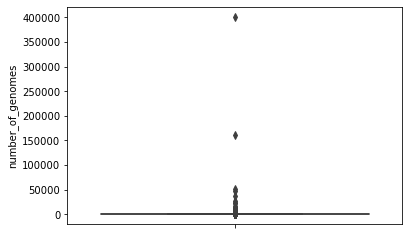

In [45]:
sns.boxplot(y=df["number_of_genomes"])

In [47]:
df.sort_values(by=['number_of_genomes']).tail(5)

,#species_taxid,min_ungapped_length,max_ungapped_length,expected_ungapped_length,number_of_genomes
70,573,4500000,6700000,5600000,37738
2544,1639,2500000,3600000,3050000,47961
2345,197,1370000,2600000,1985000,51296
63,562,4000000,6300000,5150000,160175
582,28901,4100000,6000000,5050000,400946


You can check the identity of any genome at NCBI:  

    https://www.ncbi.nlm.nih.gov/assembly/    

search by txid[species_taxid]   
txid[3707] is mustard, Brassica juncea  

Not all data is as tidy as the NCBI download.  Sometimes you need to exclude lines when you read in data.

### Tricky file formats

Open the excel sheet of data on agricultural productivy in the UK since 1973.  
This is from:
    
    https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1004686/AUK-Chapter5-22jul21.ods
        
This was originally in ods format file. It COULD be read in directly by installing the odf engine, but to save complictions I've provided it as an excel file. 

In [180]:
df = pd.read_excel('UK_agriculture.xlsx')
df.head(10)

,Date of update: 22 July 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Next update: June 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Enquiries: Alistair Murray on +44 (0) 20 8026 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data for charts Total factor productivity volu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total factor productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1973.0,1974.000000,1975.000000,1976.000000,1977.000000,1978.000000,1979.000000,1980.000000,1981.000000,...,2011.000000,2012.000000,2013.000000,2014.000000,2015.0000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
9,All outputs,100.0,103.108257,99.132659,96.532212,102.981243,107.597075,110.115183,113.133978,113.093183,...,129.789019,123.049616,125.294794,134.188676,136.8024,133.095611,138.382264,135.268059,140.497825,131.679214


This has read in only the first sheet.  We need to specify which sheet pandas should read in.

In [181]:
df = pd.read_excel('UK_agriculture.xlsx', sheet_name="Detailed_breakdown")
df.head(10)

,Date of update: 22 July 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Next update: June 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Table 5.1 Total factor productivity volume ind...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Enquiries: Alistair Murray on +44 (0) 20 8026 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Email: alistair.murray@defra.gov.uk
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1973.000000,1974.000000,1975.000000,1976.000000,1977.000000,1978.000000,1979.000000,1980.000000,1981.000000,...,2011.000000,2012.000000,2013.000000,2014.000000,2015.0,2016.000000,2017.000000,2018.000000,2019.000000,2020
7,1 Output of cereals,48.106287,51.231097,46.596368,43.044288,52.925121,57.293543,59.273864,69.997314,73.734927,...,86.976347,76.703606,76.578217,98.315500,100.0,88.497335,90.325357,80.768063,98.662454,72.728
8,wheat,31.229104,34.683665,30.610811,28.898135,31.171291,36.854712,42.696057,52.326201,52.891686,...,95.087615,80.510177,69.287506,100.064983,100.0,88.296769,88.929646,79.346690,95.965070,60.138003
9,rye,50.000000,40.000000,40.000000,45.000000,65.000000,80.000000,70.000000,70.000000,70.000000,...,110.000000,75.000000,100.000000,100.000000,100.0,100.000000,85.000000,100.000000,100.000000,100.0


At least it reads in, but it's clearly not right - the first few rows are not data.  We need to exclude them, here we do this by setting as header the first line of data (row 8, but pandas is 0-indexed, so this counts as input line 7)

In [211]:
df = pd.read_excel('UK_agriculture.xlsx', sheet_name="Detailed_breakdown", header =7)
df.head(3)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1 Output of cereals,48.106287,51.231097,46.596368,43.044288,52.925121,57.293543,59.273864,69.997314,73.734927,...,86.976347,76.703606,76.578217,98.315500,100.0,88.497335,90.325357,80.768063,98.662454,72.728000
1,wheat,31.229104,34.683665,30.610811,28.898135,31.171291,36.854712,42.696057,52.326201,52.891686,...,95.087615,80.510177,69.287506,100.064983,100.0,88.296769,88.929646,79.346690,95.965070,60.138003
2,rye,50.000000,40.000000,40.000000,45.000000,65.000000,80.000000,70.000000,70.000000,70.000000,...,110.000000,75.000000,100.000000,100.000000,100.0,100.000000,85.000000,100.000000,100.000000,100.000000


We could also skip rows

In [183]:
df = pd.read_excel('UK_agriculture.xlsx', sheet_name="Detailed_breakdown", skiprows=7)
df.head(3)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1 Output of cereals,48.106287,51.231097,46.596368,43.044288,52.925121,57.293543,59.273864,69.997314,73.734927,...,86.976347,76.703606,76.578217,98.315500,100.0,88.497335,90.325357,80.768063,98.662454,72.728000
1,wheat,31.229104,34.683665,30.610811,28.898135,31.171291,36.854712,42.696057,52.326201,52.891686,...,95.087615,80.510177,69.287506,100.064983,100.0,88.296769,88.929646,79.346690,95.965070,60.138003
2,rye,50.000000,40.000000,40.000000,45.000000,65.000000,80.000000,70.000000,70.000000,70.000000,...,110.000000,75.000000,100.000000,100.000000,100.0,100.000000,85.000000,100.000000,100.000000,100.000000


The end of the file is untidy as well

In [184]:
df.tail(5)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
67,Productivity by labour (11 divided by 23),37.212014,39.041316,38.190795,37.926773,41.188842,43.555025,45.367391,47.770544,48.743542,...,94.542502,89.601044,91.959561,98.345190,100.0,98.118729,101.149767,98.172286,101.816148,95.464810
68,Productivity by land (11 divided by 24),70.798868,71.323090,68.727430,66.955035,71.755549,74.993021,76.794093,79.205973,79.359777,...,94.735052,89.725572,90.994398,97.559822,100.0,96.096242,99.250193,97.660090,100.449810,95.575783
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,"© Crown copyright, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


and we can skip the bottom rows too

In [247]:
df = pd.read_excel('UK_agriculture.xlsx', sheet_name="Detailed_breakdown",  skiprows=7, skipfooter=3)
df.tail(5)

,Unnamed: 0,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
64,Partial factor productivity indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Productivity by intermediate consumption (11 d...,79.165130,85.401381,82.051190,77.357667,82.546018,85.296796,83.846194,87.933104,89.807832,...,100.328918,95.337357,94.494077,99.733984,100.0,96.463101,100.368103,101.184554,103.580507,96.009517
66,Productivity by capital consumption (11 divide...,85.726977,86.100980,81.623477,78.456148,82.497218,84.872998,85.687780,87.514088,87.170204,...,101.012810,94.151224,94.168941,99.507588,100.0,96.665945,98.850892,95.458943,98.137509,91.884188
67,Productivity by labour (11 divided by 23),37.212014,39.041316,38.190795,37.926773,41.188842,43.555025,45.367391,47.770544,48.743542,...,94.542502,89.601044,91.959561,98.345190,100.0,98.118729,101.149767,98.172286,101.816148,95.464810
68,Productivity by land (11 divided by 24),70.798868,71.323090,68.727430,66.955035,71.755549,74.993021,76.794093,79.205973,79.359777,...,94.735052,89.725572,90.994398,97.559822,100.0,96.096242,99.250193,97.660090,100.449810,95.575783


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  65 non-null     object 
 1   1973        64 non-null     float64
 2   1974        64 non-null     float64
 3   1975        64 non-null     float64
 4   1976        64 non-null     float64
 5   1977        64 non-null     float64
 6   1978        64 non-null     float64
 7   1979        64 non-null     float64
 8   1980        64 non-null     float64
 9   1981        64 non-null     float64
 10  1982        64 non-null     float64
 11  1983        64 non-null     float64
 12  1984        64 non-null     float64
 13  1985        64 non-null     float64
 14  1986        64 non-null     float64
 15  1987        64 non-null     float64
 16  1988        64 non-null     float64
 17  1989        64 non-null     float64
 18  1990        64 non-null     float64
 19  1991        64 non-null     flo

Empty rows are automatically skipped (compare the excel file with what is read in)

Makes more sense to have outputs as columns

In [248]:
df = df.T

In [227]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,Compensation of employees,Entrepreneurial workers (farm and specialist c...,24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Partial factor productivity indicators,Productivity by intermediate consumption (11 d...,Productivity by capital consumption (11 divide...,Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
1973,48.106287,31.229104,50.0,102.098739,51.063694,81.40525,29.145632,1.26397,1.217178,3.850554,...,260.346386,162.684868,103.247602,114.477199,63.85388,NaN,79.16513,85.726977,37.212014,70.798868
1974,51.231097,34.683665,40.0,105.151797,44.779524,81.40525,22.492126,2.160982,2.080982,3.850554,...,255.165522,160.249107,105.674349,111.070885,67.857756,NaN,85.401381,86.10098,39.041316,71.32309


Now we have the years as the row names, and the types of output as row one.  
How to fix this and make the types of output column headers?  

Grab row one (df.iloc[0]) and make it the column names.

In [249]:
df.columns = df.iloc[0]

In [229]:
df.head(3)

Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Partial factor productivity indicators,Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
Unnamed: 0,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,other oil seeds,...,Compensation of employees,Entrepreneurial workers (farm and specialist c...,24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Partial factor productivity indicators,Productivity by intermediate consumption (11 d...,Productivity by capital consumption (11 divide...,Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
1973,48.106287,31.229104,50.0,102.098739,51.063694,81.40525,29.145632,1.26397,1.217178,3.850554,...,260.346386,162.684868,103.247602,114.477199,63.85388,NaN,79.16513,85.726977,37.212014,70.798868
1974,51.231097,34.683665,40.0,105.151797,44.779524,81.40525,22.492126,2.160982,2.080982,3.850554,...,255.165522,160.249107,105.674349,111.070885,67.857756,NaN,85.401381,86.10098,39.041316,71.32309


we need to drop the redundant row 1

In [250]:
df = df[1:]

Making the index into a new column

In [251]:
df=df.reset_index()

In [232]:
df.head(3)

Unnamed: 0,index,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,...,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Partial factor productivity indicators,Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
0,1973,48.106287,31.229104,50.0,102.098739,51.063694,81.40525,29.145632,1.26397,1.217178,...,260.346386,162.684868,103.247602,114.477199,63.85388,NaN,79.16513,85.726977,37.212014,70.798868
1,1974,51.231097,34.683665,40.0,105.151797,44.779524,81.40525,22.492126,2.160982,2.080982,...,255.165522,160.249107,105.674349,111.070885,67.857756,NaN,85.401381,86.10098,39.041316,71.32309
2,1975,46.596368,30.610811,40.0,98.879973,32.006264,81.40525,23.632189,2.731807,2.630675,...,250.200026,157.813347,105.436975,110.752718,65.428754,NaN,82.05119,81.623477,38.190795,68.72743


rename the new colum

In [252]:
df.columns.values[0] = "Year"

In [246]:
df.head(3)

Unnamed: 0,Year,1 Output of cereals,wheat,rye,barley,oats and summer cereal mixtures,other cereals,2 Output of industrial crops,oil seeds,oilseed rape,...,Compensation of employees,Entrepreneurial workers (farm and specialist contractor),24 Land,25 All Inputs and Entrepreneurial Labour,Total factor productivity (11 divided by 25),Partial factor productivity indicators,Productivity by intermediate consumption (11 divided by 21),Productivity by capital consumption (11 divided by 22),Productivity by labour (11 divided by 23),Productivity by land (11 divided by 24)
0,1973-01-01,48.106287,31.229104,50.0,102.098739,51.063694,81.40525,29.145632,1.263970,1.217178,...,260.346386,162.684868,103.247602,114.477199,63.853880,NaN,79.165130,85.726977,37.212014,70.798868
1,1974-01-01,51.231097,34.683665,40.0,105.151797,44.779524,81.40525,22.492126,2.160982,2.080982,...,255.165522,160.249107,105.674349,111.070885,67.857756,NaN,85.401381,86.100980,39.041316,71.323090
2,1975-01-01,46.596368,30.610811,40.0,98.879973,32.006264,81.40525,23.632189,2.731807,2.630675,...,250.200026,157.813347,105.436975,110.752718,65.428754,NaN,82.051190,81.623477,38.190795,68.727430


A bit of exploration:

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 70 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Year                                                         48 non-null     int64 
 1   1 Output of cereals                                          48 non-null     object
 2   wheat                                                        48 non-null     object
 3   rye                                                          48 non-null     object
 4   barley                                                       48 non-null     object
 5   oats and summer cereal mixtures                              48 non-null     object
 6   other cereals                                                48 non-null     object
 7   2 Output of industrial crops                                 48 non-null     object
 8   oi

All our data columns are coded as objects now (due to the text in the column names when they were row1).  We can fix this

In [253]:
df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 70 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         48 non-null     float64
 1   1 Output of cereals                                          48 non-null     float64
 2   wheat                                                        48 non-null     float64
 3   rye                                                          48 non-null     float64
 4   barley                                                       48 non-null     float64
 5   oats and summer cereal mixtures                              48 non-null     float64
 6   other cereals                                                48 non-null     float64
 7   2 Output of industrial crops                                 48 non-null     float

In [237]:
list(df.columns)

['Year',
 '1 Output of cereals',
 'wheat',
 'rye ',
 'barley',
 'oats and summer cereal mixtures',
 'other cereals',
 '2 Output of industrial crops',
 'oil seeds ',
 'oilseed rape',
 'other oil seeds',
 'protein crops',
 'sugar beet',
 'other industrial crops',
 '3 Output of forage plants',
 '4 Output of vegetables and horticultural products',
 'fresh vegetables',
 'plants and flowers',
 '5 Output of potatoes ',
 '6 Output of fruit',
 '7 Output of other crop products ',
 'Total crop output (sum 1 - 7)',
 nan,
 '8 Output of livestock (meat)',
 'cattle',
 'pigs ',
 'sheep',
 'poultry ',
 'other animals',
 '9 Output of livestock products',
 'milk',
 'eggs',
 'raw wool',
 'other animal products',
 'Total livestock output (8 + 9)',
 nan,
 '10 Inseparable non-agricultural activities',
 nan,
 '11 All outputs',
 nan,
 '12 Seeds',
 '13 Energy',
 'electricity and fuels for heating',
 'motor and machinery fuels',
 '14 Fertilisers',
 '15 Plant protection products',
 '16 Veterinary expenses',
 '17 

<AxesSubplot:xlabel='Year', ylabel='oilseed rape'>

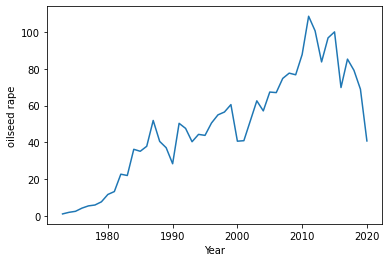

In [257]:
sns.lineplot(x='Year',y='oilseed rape', data=df)

Can you see the effect of the foot and mouth outbreak?  the green revolution in grain productivity, the swtich to imported fruit and vegetables?

### Saving dataframes

In [ ]:
Save as csv

In [55]:
df.to_csv('UK_agriculture.csv', index=False)

In [ ]:
Save as excel

In [58]:
df.to_excel('UK_agriculture.xlsx', index=False)

What happens if you leave off 'index=False'?

#### Pickling  
Sometime you are working soley within python and want to preserve the syntax exactly rather than writing to a flat csv or excel file




In [59]:
df.to_pickle('UK_crops.pkl')

Reading from pickle

In [60]:
df = pd.read_pickle('UK_crops.pkl')

Checking contents

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Production(2015=100)  65 non-null     object 
 1   1973                  64 non-null     float64
 2   1974                  64 non-null     float64
 3   1975                  64 non-null     float64
 4   1976                  64 non-null     float64
 5   1977                  64 non-null     float64
 6   1978                  64 non-null     float64
 7   1979                  64 non-null     float64
 8   1980                  64 non-null     float64
 9   1981                  64 non-null     float64
 10  1982                  64 non-null     float64
 11  1983                  64 non-null     float64
 12  1984                  64 non-null     float64
 13  1985                  64 non-null     float64
 14  1986                  64 non-null     float64
 15  1987                  64 